Model Performance:
 MAE: 0.37, MSE: 14.67, R²: 1.00


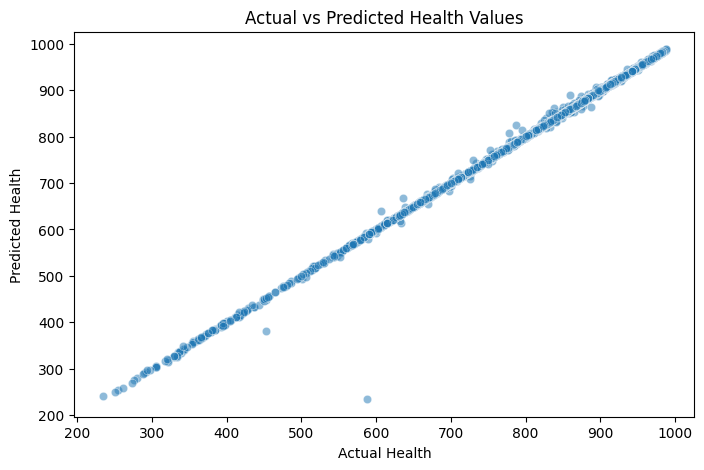

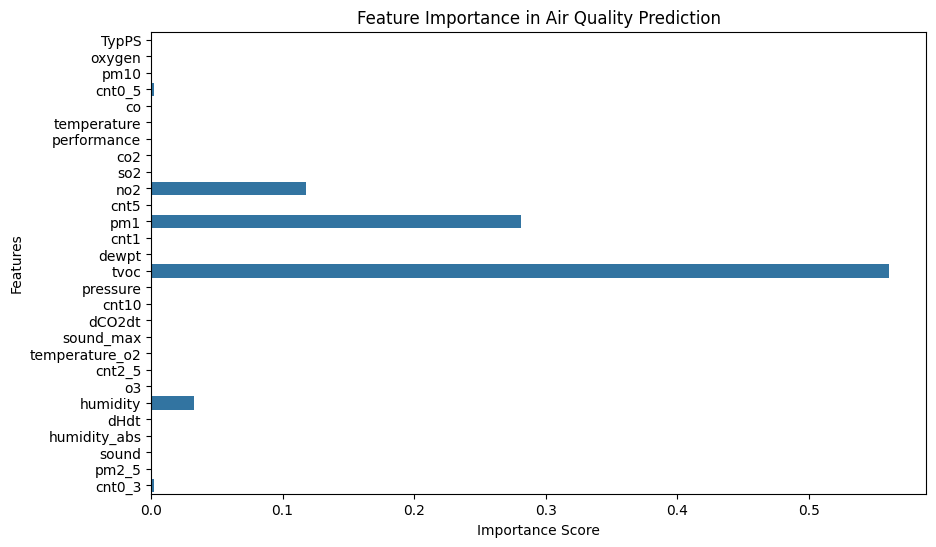

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
file_path = "/content/laboratory data.csv.csv"
df = pd.read_csv(file_path)

# Drop non-numeric columns
if "timestamp" in df.columns:
    df.drop(columns=["timestamp"], inplace=True)

# Selecting features and target
target = "health"
features = [col for col in df.columns if col != target and col != "measuretime"]

# Splitting data into train and test sets
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training a Random Forest Regressor Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Displaying model performance
print(f"Model Performance:\n MAE: {mae:.2f}, MSE: {mse:.2f}, R²: {r2:.2f}")

# Visualizing actual vs predicted values
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Health")
plt.ylabel("Predicted Health")
plt.title("Actual vs Predicted Health Values")
plt.show()

# Feature Importance Visualization
importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Air Quality Prediction")
plt.show()